<a href="https://colab.research.google.com/github/patbaa/demo_notebooks/blob/master/solution_hw_cnn_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 1. Download the cifar100 dataset via the tensorflow/keras API
 - how many classes do we have in the dataset? how many train and test examples do we have?
 - what is the dimension of the images?
 - show 5 images from the dataset!
 - make one-hot encoding for the labels

 
## 2. creating CNN architecutre
 - create a convolutional neural network
 - the network should have the following layers:
   - input (32, 32, 3)
   - conv2D, 16 kernels, kernel size = 3, valid padding, relu actvation
   - conv2D, 16 kernels, kernel size = 3, valid padding, relu actvation
   - maxpooling kernel size = 2*2
   - conv2D, 32 kernels, kernel size = 3, valid padding, relu actvation
   - conv2D, 32 kernels, kernel size = 3, valid padding, relu actvation
   - maxpooling kernel size = 2*2
   - flatten
   - dense, 100 neurons, softmax activation
 - how many parameters do we have for each layer?
 
## 3. training the CNN
 - use Adam optimizer with default parameters
 - use categorical crossentropy as loss function
 - compile the model
 - print out a summary of the model
 - train the CNN on the training data for 5 epochs with batch size of 32
 - use the test data as validation data
 
## 4. Evaluate performance
 - plot the training and the validation loss on the same plot!
 - plot the training and the validation accuracy on the same plot!
 - do we overfit?

## 5. Train an other CNN
 - as we can see the previous archutecture is not the best...
 - come up with an architecture that can achieve more than 50% accuracy on the test set.
 - print out the summary for this model!
 - plot the loss and accuracy curves for this model too!

## 1. Download the cifar100 dataset via the keras API
 - how many classes do we have in the dataset? how many train and test examples do we have?
 - what is the dimension of the images?
 - show 5 images from the dataset!
 - make one-hot encodig for the labels

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100


%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 6s 0us/step


In [3]:
x_train.shape

# we have 50k images, each is 32*32pixels with 3 color channels

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
len(pd.unique(y_train.reshape(y_train.shape[0])))
# we have 100 classes

100

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


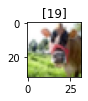

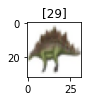

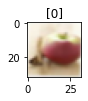

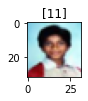

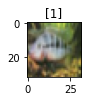

In [6]:
plt.rcParams['figure.figsize'] = (1, 1)
for i in range(5):
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.show()

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
y_train_oh = to_categorical(y_train)
y_test_oh  = to_categorical(y_test)

## 2. creating CNN architecutre
 - create a convolutional neural network
 - the network should have the following layers:
   - input (32, 32, 3)
   - conv2D, 16 kernels, kernel size = 3, valid padding, relu actvation
   - conv2D, 16 kernels, kernel size = 3, valid padding, relu actvation
   - maxpooling kernel size = 2*2
   - conv2D, 32 kernels, kernel size = 3, valid padding, relu actvation
   - conv2D, 32 kernels, kernel size = 3, valid padding, relu actvation
   - maxpooling kernel size = 2*2
   - flatten
   - dense, 100 neurons, softmax activation
 - how many parameters do we have for each layer?

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [10]:
model = Sequential()
#add model layers
model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(100, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0

## 3. training the CNN
 - scale the training and testing data to have 0 mean and 1 variance!
 - use Adam optimizer with default parameters
 - use categorical crossentropy as loss function
 - use accuracy as metric
 - compile the model
 - print out a summary of the model
 - train the CNN on the training data for 5 epochs with batch size of 32
 - save the history of the training process!

In [11]:
std = x_train.std()
mean = x_train.mean()

x_train = (x_train - mean)/std
x_test  = (x_test - mean)/std

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train_oh, epochs=10, batch_size=32, validation_data=(x_test, y_test_oh))

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 3.6373 - accuracy: 0.1618 - val_loss: 3.2236 - val_accuracy: 0.2416
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.9546 - accuracy: 0.2838 - val_loss: 2.8827 - val_accuracy: 0.2998
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.6449 - accuracy: 0.3429 - val_loss: 2.7841 - val_accuracy: 0.3262
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.4477 - accuracy: 0.3849 - val_loss: 2.6954 - val_accuracy: 0.3431
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.2992 - accuracy: 0.4150 - val_loss: 2.6696 - val_accuracy: 0.3465
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.1796 - accuracy: 0.4405 - val_loss: 2.6512 - val_accuracy: 0.3559
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.0801 - accuracy: 0.4616 - val_loss: 2.6042 - val_accuracy:

## 4. Evaluate performance
 - plot the training and the validation loss on the same plot!
 - plot the training and the validation accuracy on the same plot!
 - do we overfit?

In [14]:
history.history

{'accuracy': [0.1617799997329712,
  0.2837600111961365,
  0.3429200053215027,
  0.38486000895500183,
  0.41499999165534973,
  0.4404599964618683,
  0.46160000562667847,
  0.4798400104045868,
  0.49559998512268066,
  0.5103999972343445],
 'loss': [3.6372928619384766,
  2.954625368118286,
  2.64493727684021,
  2.4476561546325684,
  2.2992427349090576,
  2.179614305496216,
  2.080098867416382,
  1.9930634498596191,
  1.920112133026123,
  1.8529298305511475],
 'val_accuracy': [0.24160000681877136,
  0.29980000853538513,
  0.326200008392334,
  0.34310001134872437,
  0.3465000092983246,
  0.35589998960494995,
  0.36000001430511475,
  0.35569998621940613,
  0.3652999997138977,
  0.35690000653266907],
 'val_loss': [3.223576307296753,
  2.8827109336853027,
  2.7840893268585205,
  2.695448637008667,
  2.6695659160614014,
  2.6511781215667725,
  2.6041853427886963,
  2.6716043949127197,
  2.643571615219116,
  2.7269575595855713]}

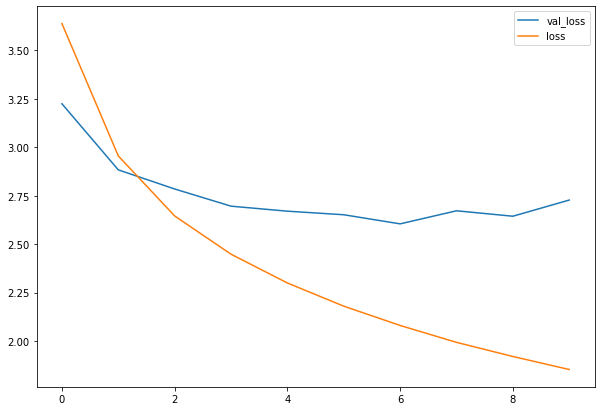

In [15]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()

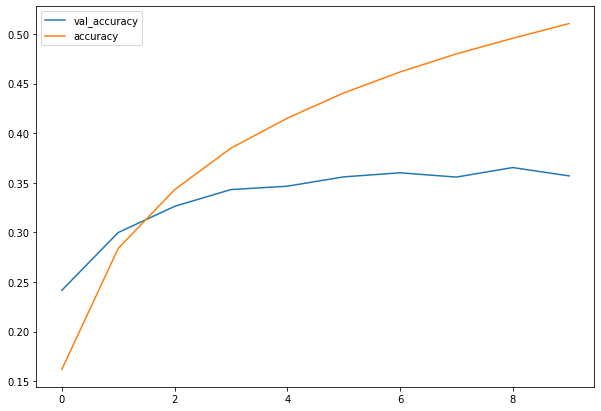

In [16]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.show()

## 5. Train an other CNN
 - as we can see the previous archutecture is not the best...
 - come up with an architecture that can achieve more than 40% accuracy on the test set.
 - print out the summary for this model!
 - plot the loss and accuracy curves for this model too!

### Make it deeper and have more conv kernels!

In [17]:
model = Sequential()
#add model layers
model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(32,32,3), padding='same'))
model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(100, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 256)       590080    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)            

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_oh, epochs=10, batch_size=256, validation_data=(x_test, y_test_oh))

Epoch 1/10
196/196 [==============================] - 9s 48ms/step - loss: 3.5588 - accuracy: 0.1761 - val_loss: 2.9659 - val_accuracy: 0.2900
Epoch 2/10
196/196 [==============================] - 9s 45ms/step - loss: 2.5236 - accuracy: 0.3715 - val_loss: 2.4731 - val_accuracy: 0.3855
Epoch 3/10
196/196 [==============================] - 9s 45ms/step - loss: 1.8642 - accuracy: 0.5134 - val_loss: 2.2493 - val_accuracy: 0.4338
Epoch 4/10
196/196 [==============================] - 9s 45ms/step - loss: 1.2905 - accuracy: 0.6475 - val_loss: 2.4506 - val_accuracy: 0.4331
Epoch 5/10
196/196 [==============================] - 9s 45ms/step - loss: 0.7625 - accuracy: 0.7824 - val_loss: 2.8969 - val_accuracy: 0.4305
Epoch 6/10
196/196 [==============================] - 9s 44ms/step - loss: 0.3899 - accuracy: 0.8814 - val_loss: 3.7190 - val_accuracy: 0.4111
Epoch 7/10
196/196 [==============================] - 9s 45ms/step - loss: 0.2133 - accuracy: 0.9339 - val_loss: 4.3739 - val_accuracy: 0.4045

40-ish % accuracy. Let's try dropout!

In [19]:
from tensorflow.keras.layers import Dropout

In [20]:
model = Sequential()
#add model layers
model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(32,32,3), padding='same'))
model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 256)       295168    
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 256)       590080    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16384)            

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_oh, epochs=10, batch_size=256, validation_data=(x_test, y_test_oh))

Epoch 1/10
196/196 [==============================] - 9s 46ms/step - loss: 3.5898 - accuracy: 0.1698 - val_loss: 2.9624 - val_accuracy: 0.2849
Epoch 2/10
196/196 [==============================] - 9s 45ms/step - loss: 2.6823 - accuracy: 0.3367 - val_loss: 2.4486 - val_accuracy: 0.3879
Epoch 3/10
196/196 [==============================] - 9s 45ms/step - loss: 2.2106 - accuracy: 0.4335 - val_loss: 2.2217 - val_accuracy: 0.4266
Epoch 4/10
196/196 [==============================] - 9s 45ms/step - loss: 1.8560 - accuracy: 0.5092 - val_loss: 2.0740 - val_accuracy: 0.4692
Epoch 5/10
196/196 [==============================] - 9s 45ms/step - loss: 1.5924 - accuracy: 0.5671 - val_loss: 2.0438 - val_accuracy: 0.4787
Epoch 6/10
196/196 [==============================] - 9s 45ms/step - loss: 1.3625 - accuracy: 0.6219 - val_loss: 2.0139 - val_accuracy: 0.4832
Epoch 7/10
196/196 [==============================] - 9s 44ms/step - loss: 1.1675 - accuracy: 0.6668 - val_loss: 2.0049 - val_accuracy: 0.5004